<h2 align='center'>FINAL PROJECT OF ADVANCED STATISTICS FOR PHYSICS ANALYSIS</h2>
<h1 align='center'>Naive Bayes Classifier for Fake News recognition

    
    
**Name**
    
  
    
Asal Rangrazi Asl

In [11]:
library(gmodels)
library(tm)
library(SnowballC)
library(e1071)
library(wordcloud)
library(ggplot2)
library(dplyr)
library(lattice)
library(gridExtra)
library(fastNaiveBayes)

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# introduction
A Naive Bayes Classifier for Fake News Recognition in R is a machine learning model designed to distinguish between fake and real news articles using the Naive Bayes algorithm within the R programming language.

### Naive Bayes Classifier
A Naive Bayes Classifier is a fundamental and widely-used machine learning algorithm for classification tasks. It is based on Bayes' theorem, a probabilistic formula that calculates the probability of an event occurring based on prior knowledge of related events.

probabilistic machine learning model is based on the Bayes theorem:

$$P(A|B,I)=\frac{P(B|A,I)P(A|I)}{P(B|I)}$$

Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

In this project A is label for each news and B is set of words in that news.
$$B=(b_{1},b_{2},...,b_{n})$$

Possible suggested lables for classifying the text are the following:

• True - 5

• Not-Known - 4

• Mostly-True - 3

• Half-True - 2

• False - 1

• Barely-True - 0

### Step of project :

- Preprocess your text data:

Before applying the Naive Bayes classifier, I'll need to preprocess your text data. This typically involves steps like tokenization, removing punctuation, converting to lowercase, removing stop words, and stemming or lemmatization.

- Split your data into training and testing sets:

To evaluate the performance of the classifier, it's important to split your data into a training set and a testing set. The training set will be used to train the Naive Bayes model, while the testing set will be used to evaluate its accuracy.

- Train the Multinomial Naive Bayes model:

According to this theory, after preparing data, I build and apply my model on the training dataset.

Then use two functions,"naiveBayes"(from e1071 library) and "fnb.multinomial"(from fastNaiveBayes library) to compare their accuracy and computation time of them with our model.

Finally, I apply the model on the test dataset.

### Read data

The data used in this project is a collection of news texts each with different labels which can be found Kaggle dataset: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv

In [12]:
DF <- read.csv("train.csv")
head(DF)
cat("dataset size:", nrow(DF))

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"
6,5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


dataset size: 10240

In [ ]:
DF$Labels

[1] 1 2 3 1 2 5 0 2 2 3 3 2 1 3 0 2 5 0 2 3 1 3 3 2 0 1 3 2 1 3 5 0 1 3 3 5
   [37] 5 5 4 5 1 2 4 4 1 2 4 1 4 5 0 0 1 5 0 2 2 0 1 3 1 3 5 3 1 4 5 1 0 0 5 0
   [73] 3 3 3 5 1 0 1 2 5 2 1 1 5 2 3 3 0 1 1 5 3 2 0 0 5 3 5 3 1 4 3 3 1 5 2 5
  [109] 2 1 3 2 2 0 5 3 3 4 4 1 3 3 5 3 3 5 3 1 4 2 3 3 3 0 5 1 5 4 0 3 1 0 3 3
  [145] 2 5 1 2 1 0 3 0 1 2 4 5 1 2 2 0 0 0 2 2 1 0 1 4 3 2 5 2 2 3 2 1 3 2 5 5
  [181] 5 5 2 2 3 1 2 2 3 1 3 3 4 2 5 3 1 1 2 4 3 0 1 0 1 0 1 1 1 5 5 1 5 3 0 5
  [217] 5 1 2 2 3 2 5 0 3 5 5 0 2 2 3 2 3 3 2 4 3 0 0 5 1 5 3 3 2 2 5 0 1 2 2 3
  [253] 3 0 1 2 5 5 1 3 0 4 1 5 4 0 1 2 3 2 2 5 2 2 2 1 0 2 0 1 5 2 3 1 0 0 2 3
  [289] 1 1 4 5 3 0 0 0 4 1 3 3 4 3 1 4 3 2 1 2 2 5 5 0 0 2 0 2 5 4 2 0 0 0 5 0
  [325] 1 2 2 1 0 0 4 3 1 5 3 2 2 3 2 3 3 3 2 5 2 0 2 2 5 2 1 3 5 4 4 2 0 5 2 2
  [361] 3 1 0 1 3 1 5 2 2 2 2 2 3 4 0 4 0 3 0 1 2 0 5 3 2 5 2 2 0 1 5 4 5 0 4 2
  [397] 5 0 3 1 0 4 2 2 2 1 4 0 5 2 3 0 5 1 2 5 2 2 3 1 3 3 4 0 3 3 2 3 0 2 1 1
  [433] 0 5 0 3 2 2 0 5 5 1 1 4 4 3 1 0 3 4 3 1 5 5 2 2 5 2 0 2 1 2 0 5 0 2 3 1
  [469] 5 1 4 3 0 4 1 2 1 2 0 1 1 1 2 0 4 1 1 5 3 5 1 0 2 2 3 0 2 3 5 2 2 1 0 5
  [505] 2 2 5 1 2 1 3 3 3 0 4 4 5 1 4 2 1 2 3 2 2 3 2 4 2 5 5 0 1 1 0 5 1 2 2 3
  [541] 0 4 3 4 4 5 5 1 5 3 1 5 2 4 3 5 0 2 1 5 2 5 3 3 3 1 0 2 1 2 2 5 0 0 2 3
  [577] 1 3 1 3 0 2 2 3 5 3 1 3 3 5 2 0 5 1 3 0 0 1 3 2 2 0 2 5 5 3 1 0 5 5 1 1
  [613] 3 1 5 0 2 4 0 2 5 3 3 3 1 2 1 2 5 2 5 5 5 1 0 4 4 1 5 5 5 3 1 2 2 1 5 5
  [649] 1 2 3 3 1 0 5 2 4 3 1 2 5 1 1 0 5 1 3 5 0 4 2 1 2 1 3 5 3 3 0 2 3 1 2 3
  [685] 2 2 2 5 5 1 3 3 2 5 3 1 2 1 5 0 2 3 4 0 1 5 4 2 3 1 4 3 1 1 3 5 2 1 1 0
  [721] 1 3 3 1 1 5 4 2 3 1 2 3 3 0 0 3 3 1 4 5 2 4 4 3 3 3 3 2 2 2 0 5 5 5 4 3
  [757] 3 1 5 1 2 0 4 0 3 2 5 5 1 1 5 1 3 0 2 2 2 1 2 1 1 3 2 5 5 0 0 3 5 3 2 1
  [793] 5 1 1 1 0 1 1 1 2 3 5 5 5 0 2 3 0 5 5 1 0 3 0 2 4 3 5 0 3 2 5 1 5 5 1 1
  [829] 0 3 3 0 1 3 0 2 5 5 3 1 5 0 3 5 3 3 2 4 1 4 5 1 2 0 5 0 0 3 3 4 1 1 3 2
  [865] 1 3 0 2 2 5 3 2 5 5 3 2 1 3 2 0 2 0 4 1 4 2 1 5 1 2 1 4 4 2 1 3 5 2 4 1
  [901] 5 3 3 0 1 2 0 1 4 4 3 3 2 1 3 1 2 0 1 1 4 3 1 5 1 2 3 0 1 1 3 5 3 3 0 0
  [937] 1 3 2 1 4 0 2 1 1 0 1 1 1 0 2 0 5 4 3 1 1 1 5 1 5 3 1 4 3 2 1 0 0 2 2 2
  [973] 5 2 2 3 3 4 1 5 0 3 3 1 0 2 1 1 4 2 1 5 2 4 4 1 0 3 2 0 2 0 2 5 5 5 1 3
 [1009] 1 3 0 4 4 1 2 1 2 2 2 0 1 1 1 3 2 1 2 1 2 5 4 5 3 4 3 2 0 1 1 2 3 1 2 1
 [1045] 1 2 1 1 0 2 2 4 0 2 3 2 0 3 5 2 3 2 3 4 3 3 0 3 5 5 1 5 0 1 2 2 4 2 3 0
 [1081] 3 1 3 1 1 3 3 3 3 5 1 1 0 5 1 2 2 5 1 4 5 2 0 5 3 3 0 1 5 2 2 3 0 5 3 3
 [1117] 0 2 2 1 5 0 1 1 2 5 2 5 5 2 2 3 3 0 1 0 4 3 0 1 5 4 2 5 1 1 3 2 0 0 3 3
 [1153] 1 5 4 2 0 3 0 5 3 2 5 3 3 1 4 2 2 2 0 3 1 3 0 4 1 3 2 5 1 5 4 2 2 3 3 0
 [1189] 4 2 5 1 1 1 3 2 4 5 0 5 1 0 5 1 0 3 1 3 3 5 1 3 3 3 1 0 4 2 0 4 3 3 2 3
 [1225] 0 5 5 4 0 0 1 2 3 1 2 3 1 4 2 1 3 5 0 0 0 0 0 5 1 3 1 5 1 4 0 0 1 3 3 5
 [1261] 2 1 1 4 1 4 1 2 1 4 0 1 4 3 1 2 2 3 2 2 3 3 1 3 5 3 1 5 5 1 0 5 2 0 1 3
 [1297] 2 5 5 4 1 3 5 1 3 1 2 4 4 5 3 4 0 4 5 1 0 0 3 3 5 5 3 5 0 2 1 5 1 2 0 5
 [1333] 1 3 5 5 3 3 5 0 5 5 3 4 3 5 3 3 3 5 3 2 1 1 4 0 0 4 0 2 0 4 2 0 5 1 1 0
 [1369] 1 1 4 3 1 4 2 5 4 3 5 3 3 2 0 3 1 2 5 4 0 3 4 1 3 5 3 3 5 3 3 3 3 2 5 1
 [1405] 0 1 1 0 0 3 3 1 0 1 1 3 0 1 0 3 1 0 5 1 1 4 2 4 2 3 5 5 1 4 2 1 5 5 4 4
 [1441] 3 3 2 2 5 4 3 2 3 0 3 0 2 1 3 0 2 3 2 4 2 1 3 0 2 0 3 5 5 1 5 5 0 4 2 0
 [1477] 5 2 2 5 3 2 1 0 1 5 3 3 2 3 1 5 1 2 3 3 2 1 1 2 3 3 0 5 5 5 1 1 5 5 5 1
 [1513] 0 0 2 5 2 5 2 1 0 1 0 2 2 5 2 5 1 1 3 0 1 5 5 1 0 5 3 1 1 0 4 2 1 0 4 2
 [1549] 3 3 1 2 0 4 5 5 3 2 4 3 5 3 3 3 1 2 4 2 5 5 2 3 5 1 4 0 4 4 2 4 4 5 2 1
 [1585] 5 3 2 3 1 5 1 4 1 0 4 4 1 1 2 1 3 5 3 0 1 5 2 3 0 0 3 2 1 2 1 2 5 0 0 4
 [1621] 2 4 5 3 2 3 5 0 1 5 0 0 3 1 0 3 3 5 5 5 0 0 4 3 5 4 0 0 2 0 1 1 2 0 2 2
 [1657] 4 3 2 3 3 1 5 3 0 2 5 3 0 1 5 1 5 1 0 5 0 5 1 3 5 2 3 0 2 0 5 1 2 1 1 0
 [1693] 3 1 3 0 2 1 5 3 0 0 3 1 0 5 0 3 5 1 2 1 5 2 1 0 1 1 5 0 5 2 4 5 5 2 5 1
 [1729] 2 5 4 2 2 5 0 2 3 3 2 5 5 2 1 0 4 0 2 2 5 3 3 1 2 5 5 5 2 5 1 5 1 1 3 2
 [1765] 2 1 2 4 1 0 3 5 2 3 0 3 1 2 0 2 2 2 0 5 3 1 5 3 1 5 4 3 2 2 0 3 0 1 0 0
 [18

In [ ]:
DF.test <- read.csv("test.csv")
head(DF.test)
cat("dataset size:", nrow(DF.test))

,Text,Text_Tag
,<chr>,<chr>
1,Building a wall on the U.S.-Mexico border will take literally years.,immigration
2,Wisconsin is on pace to double the number of layoffs this year.,jobs
3,Says John McCain has done nothing to help the vets.,"military,veterans,voting-record"
4,Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.,"medicare,message-machine-2012,campaign-advertising"
5,"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.","campaign-finance,legal-issues,campaign-advertising"
6,Over the past five years the federal government has paid out $601 million in retirement and disability benefits to deceased former federal employees.,"federal-budget,pensions,retirement"


dataset size: 1267

In [ ]:
# labels

label.list <- c(0,1,2,3,4,5)
df <- DF[DF$Labels %in% label.list, ]   #filtering the dataframe for the lables in label.list

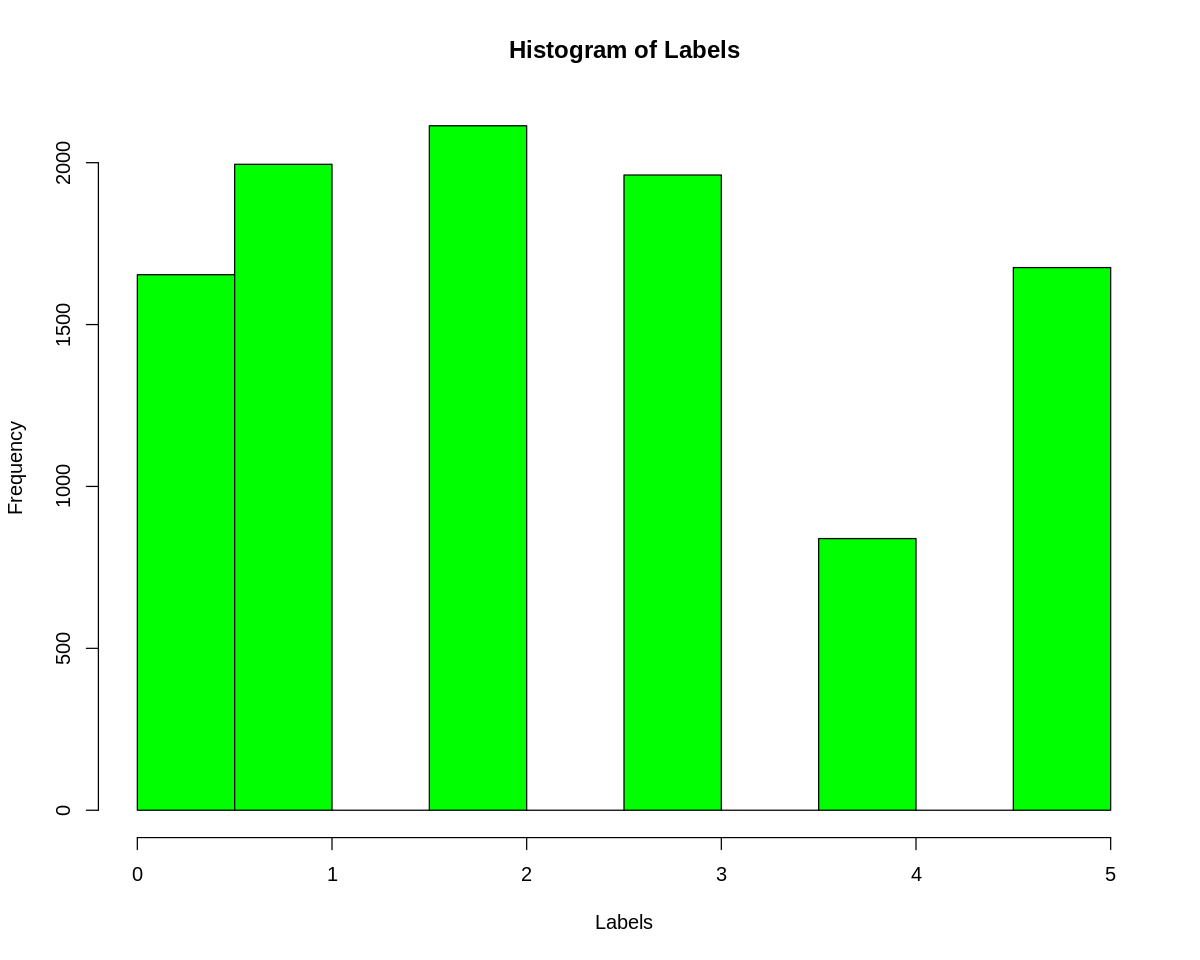

In [ ]:
options(repr.plot.width=10, repr.plot.height =8)    #changing size of plots
hm <- hist(df$Labels, main='Histogram of Labels',col='green' , xlab='Labels', ,xlim=c(0,5))

### Preprocessing step ( cleaning data )

In R, there are several packages available for text cleaning and preprocessing.

1. Create a VCorpus:
Vector Corpus is a class that represents a collection of text documents stored as a vector. It is a type of corpus object provided by the package.

2. Convert text to lowercase:
Converting all text to lowercase can help with standardization and avoid duplicate representations of the same word.

3. Remove punctuation:
Removing punctuation marks can be beneficial as they usually don't carry much meaning in text analysis.

4. Remove numbers:
If numbers are not relevant to your analysis, you can remove them using the tm_map().

5. Remove stopwords:
Stopwords are common words (e.g., "the," "is," "and") that are often removed because they don't carry significant meaning.

6. Perform stemming or lemmatization (optional):
Stemming and lemmatization are techniques to reduce words to their base or root form.

7. Clean up extra whitespaces:
Extra whitespaces can be removed to ensure consistency.

In [ ]:
# implement preprocessing step :cleaning data

df_corp <- VCorpus(VectorSource(as.character(df$Text)))



In [ ]:
#extract a portion of a data fram
inspect(df_corp[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 82

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 141



In [ ]:
lapply(df_corp[1:3], as.character)

$`1`
[1] "Says the Annies List political group supports third-trimester abortions on demand."

$`2`
[1] "When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration."

$`3`
[1] "Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\""

In [ ]:
#Convert text to lowercase:
df_corp <- tm_map(df_corp, content_transformer(tolower))

In [ ]:
# Remove punctuation
df_corp <- tm_map(df_corp, removePunctuation)

In [ ]:
# Remove numbers
df_corp <- tm_map(df_corp, removeNumbers)

In [ ]:
# Remove stopwords
df_corp <- tm_map(df_corp, removeWords, stopwords("english"))

In [ ]:
lapply(df_corp[1:5], as.character)

$`1`
[1] "says  annies list political group supports thirdtrimester abortions  demand"

$`2`
[1] "   decline  coal start  started  natural gas took   started  begin  president george w bushs administration"

$`3`
[1] "hillary clinton agrees  john mccain  voting  give george bush  benefit   doubt  iran"

$`4`
[1] "health care reform legislation  likely  mandate free sex change surgeries"

$`5`
[1] " economic turnaround started   end   term"

In [ ]:
#applying word stemming : process of reducing words to their base or root form
#Perform stemming or lemmatization
df_corp <- tm_map(df_corp, stemDocument)

In [ ]:
lapply(df_corp[1:5], as.character)

$`1`
[1] "say anni list polit group support thirdtrimest abort demand"

$`2`
[1] "declin coal start start natur gas took start begin presid georg w bush administr"

$`3`
[1] "hillari clinton agre john mccain vote give georg bush benefit doubt iran"

$`4`
[1] "health care reform legisl like mandat free sex chang surgeri"

$`5`
[1] "econom turnaround start end term"

In [ ]:
#Clean up extra whitespaces:
df_corp <- tm_map(df_corp, stripWhitespace)

In [ ]:
lapply(df_corp[1:5], as.character)

$`1`
[1] "say anni list polit group support thirdtrimest abort demand"

$`2`
[1] "declin coal start start natur gas took start begin presid georg w bush administr"

$`3`
[1] "hillari clinton agre john mccain vote give georg bush benefit doubt iran"

$`4`
[1] "health care reform legisl like mandat free sex chang surgeri"

$`5`
[1] "econom turnaround start end term"

## DTM

Converting text data into a document-term matrix (DTM) is a common step in text analysis and natural language processing tasks.

Machine learning algorithms typically require numerical input. By converting text data into a document-term matrix, you transform the text into a numerical format that can be used for modeling and analysis.

Each row in the DTM represents a document (piece of text), and each column represents a unique term (word or token).

In [ ]:
#Converting text data into a document-term matrix (DTM) is a common step in text analysis and natural language processing tasks.
#Machine learning algorithms typically require numerical input. By converting text data into a document-term matrix, you transform the text into a numerical format that can be used for modeling and analysis.

df_dtm  <- DocumentTermMatrix(df_corp)
df_dtm



<<DocumentTermMatrix (documents: 10240, terms: 8347)>>
Non-/sparse entries: 102068/85371212
Sparsity           : 100%
Maximal term length: 68
Weighting          : term frequency (tf)

In [ ]:
#findFreqTerms finds the list of words with higher frequecny than minfreq

minfreq     <-  10                                #words with frequency of repetition less that minfreq will be removed
freq_words  <-  findFreqTerms(df_dtm, minfreq)   #findFreqTerms finds the list of words with higher frequecny than minfreq
df_dtm      <-  df_dtm[,freq_words]

In [ ]:
# put everything toghether
#visualization
#defining a function which to prepare the needed data before feeding it to wordcloud

w_cloud <- function(df){

    #basically applyting the former transformations, nothing new to be discussed
    df$Text = as.character(df$Text)
    df <- VCorpus(VectorSource(df$Text))
    df <- tm_map(df ,content_transformer(tolower))
    df <- tm_map(df ,removeNumbers)
    df <- tm_map(df ,removeWords,stopwords())
    df <- tm_map(df ,removePunctuation)
    df <- tm_map(df ,stemDocument)
    df <- tm_map(df ,stripWhitespace)

    wordcloud(df,min.freq = 10,,colors=brewer.pal(8, "Dark2"), rot.per=0.35) #max.words is most common words
}

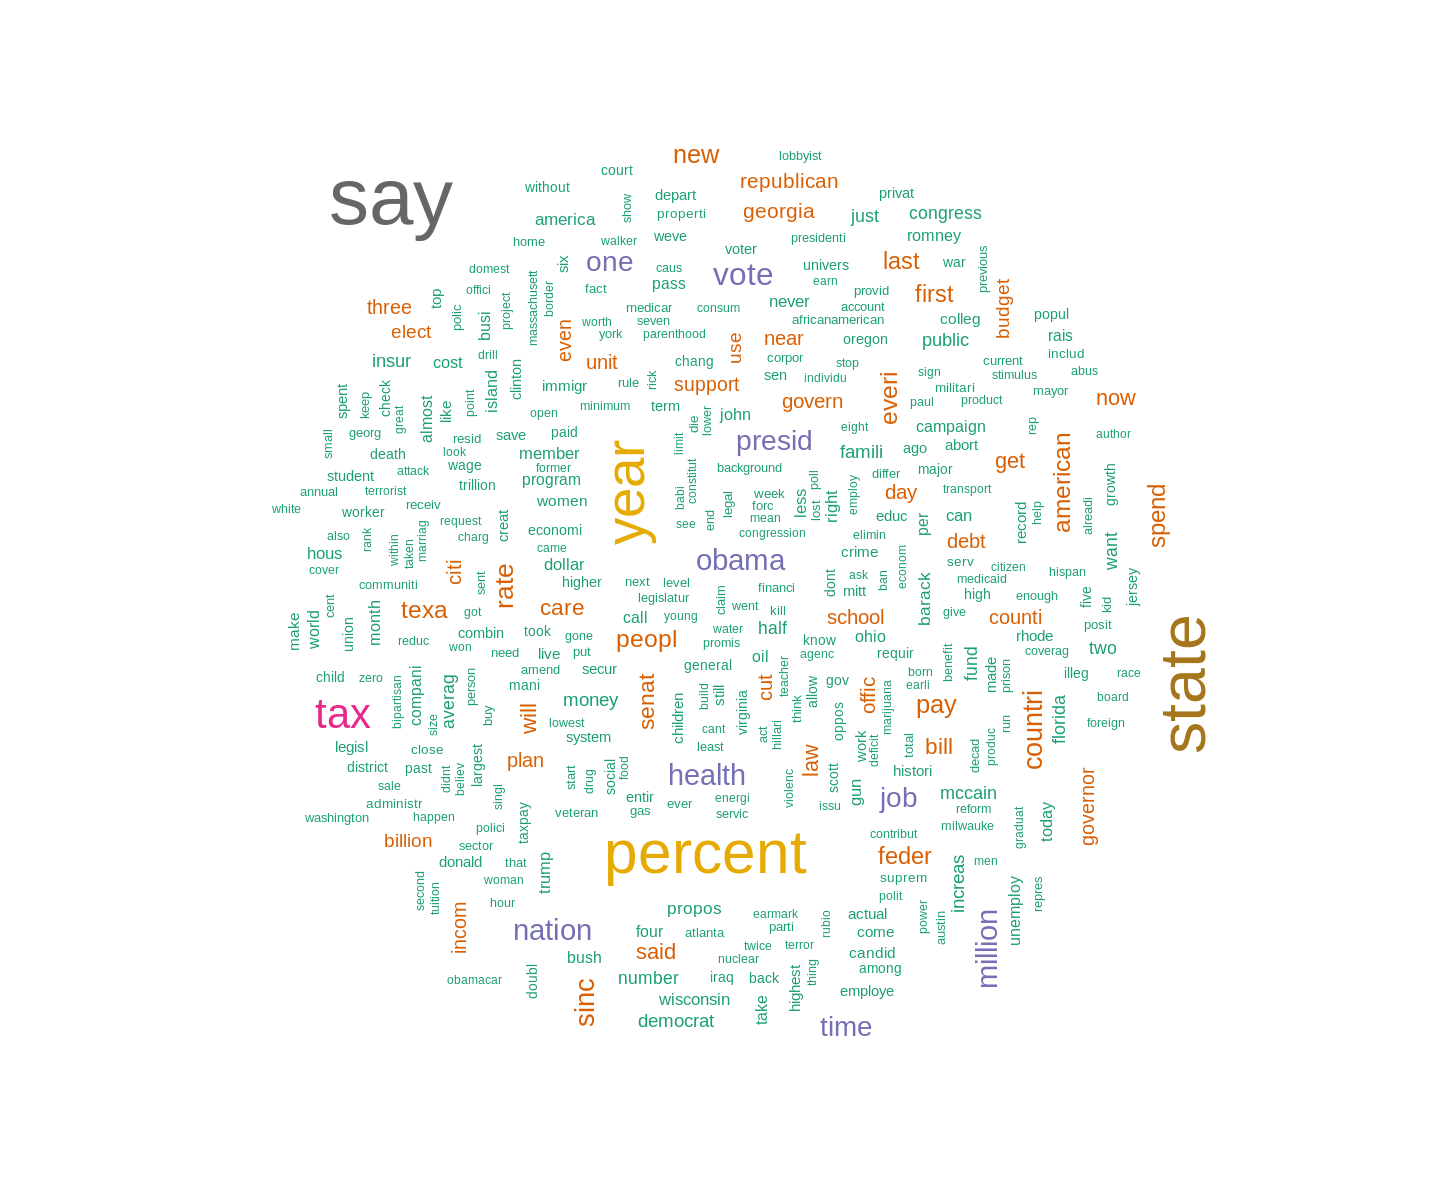

In [ ]:
options(repr.plot.width=12, repr.plot.height =10)  #changing size of plots

df_fake <- subset(df,Labels == 1)
df_true <- subset(df,Labels == 5)

#for the true news:
w_cloud(df_true)

### Split data into train & validation & test dataset

In [ ]:
test_ratio <- 0.15
SEED       <- 5

X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y   <- df$Labels

set.seed(SEED)
test_size  <- as.integer(nrow(X)* test_ratio)
train_size <- nrow(X) - test_size

test_index <- sample(seq(1:nrow(X)), test_size)

X_test    <- X[test_index, ]         #reading the features from the document term matrix
Y_test    <- Y[test_index  ]         #reading the labels from the initial dataframe

X_train   <- X[! seq(1:nrow(X)) %in% test_index, ]
Y_train   <- Y[! seq(1:nrow(X)) %in% test_index  ]

X_val     <- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
Y_val     <- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]

X_train   <- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ]
Y_train   <- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]

cat("Train  Set Size:", nrow(X_train))
cat("\nTest   Set Size:", length(Y_test))
cat("\nValid. Set Size:", length(Y_val))

Train  Set Size: 7138
Test   Set Size: 1536
Valid. Set Size: 1566

In [20]:
# function of splitting(I will use it then)

train_test_splitter <- function(df_dtm, df, test_ratio, SEED){

    X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
    Y   <- df$Labels

    set.seed(SEED)
    test_size  <- as.integer(nrow(X)* test_ratio)
    train_size <- nrow(X) - test_size

    test_index <- sample(seq(1:nrow(X)), test_size)

    X_test    <<- X[test_index, ]         #reading the features from the document term matrix
    Y_test    <<- Y[test_index  ]     #reading the labels from the initial dataframe

    X_train   <<- X[! seq(1:nrow(X)) %in% test_index, ]
    Y_train   <<- Y[! seq(1:nrow(X)) %in% test_index  ]

    X_val     <<- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
    Y_val     <<- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]


    X_train   <<- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ]
    Y_train   <<- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]

    cat("Train Set Size:", nrow(X_train))
    cat("\nTest  Set Size:", length(Y_test))
    cat("\nValidation Set Size:", length(Y_val))
#   cat("\nThe sum of Samples:", sum(nrow(X_train), length(Y_test), length(Y_val)))
}

### NaiveBayes Multinomial Classifer

Now having all cards on the table we start to build a NaiveBayes Multinomial Classifer exactly as what is described in the introduction part. We start on training set and build up step by step to obtain the probability of each word occuring in a specific labels. We store all these probabilities in a final dataframe. This dataframe is basically our classifer. This classifer is then used to predict the labels of test set samples.


In [ ]:
#lets just see the output of x train
#Each row corresponds to one sample (a news) and the columns are a collection of all the words in the dataframe
head(X_train, 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,year,yearold,yet,york,young,your,youth,youv,zero,zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1849,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
1851,0,0,0,0,0,0,0,0,0,0,⋯,2,0,0,0,0,0,0,0,0,0


In [ ]:
# corresboinding label
#cbind :is used to combine vectors, matrices, or data frames by column binding
head(cbind(X_train, Y_train), 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,yearold,yet,york,young,your,youth,youv,zero,zone,Y_train
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1849,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
1851,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2


### training

In [ ]:
##grouping by labels and counting the frequency
#cosidering a specific label, how many times a specific word is repeated
# aggregate :group-wise operations
df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum)
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,year,yearold,yet,york,young,your,youth,youv,zero,zone
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3,2,7,2,19,1,3,4,6,⋯,133,3,7,9,2,9,2,0,4,1
1,2,4,6,4,22,2,3,5,2,⋯,134,2,2,8,5,13,1,1,3,0
2,5,2,3,0,21,1,1,4,9,⋯,191,0,7,6,12,11,3,4,6,5
3,3,5,10,0,8,3,1,6,5,⋯,189,2,5,10,6,9,3,5,4,0
4,0,0,1,1,6,3,0,3,2,⋯,36,1,2,3,0,0,0,0,4,2
5,0,0,3,0,18,2,8,4,5,⋯,166,1,3,11,6,4,1,5,6,0


### Add one to all elements:

In the training set, we determine the frequency of each word. If a word has a frequency of zero within a specific label, the probability of that word in the model dataset will also be zero ($P(b_{i}|A)=0$). Consequently, when calculating the probability of a label for test news that contains this word, the final probability for that label will be zero, even if the probabilities for other words are high. This can lead to the label not being chosen for the wrong reasons.

To address this issue, we employ a simple solution: we add 1 to the frequencies of all words in the training dataset. By doing this, we ensure that no word in the test news has a zero probability. This modification allows our model to make more informed and accurate predictions."







In [ ]:
#we go add one to all the elements
df_count <- df_count + 1
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,year,yearold,yet,york,young,your,youth,youv,zero,zone
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,3,8,3,20,2,4,5,7,⋯,134,4,8,10,3,10,3,1,5,2
2,3,5,7,5,23,3,4,6,3,⋯,135,3,3,9,6,14,2,2,4,1
3,6,3,4,1,22,2,2,5,10,⋯,192,1,8,7,13,12,4,5,7,6
4,4,6,11,1,9,4,2,7,6,⋯,190,3,6,11,7,10,4,6,5,1
5,1,1,2,2,7,4,1,4,3,⋯,37,2,3,4,1,1,1,1,5,3
6,1,1,4,1,19,3,9,5,6,⋯,167,2,4,12,7,5,2,6,7,1


In [ ]:
df_count$Y_train   <- NULL               #dropping an unneseccary column
df_count$total.num <- rowSums(df_count)  #summing over the rows
df_count <- cbind(label.list, df_count)  #adding a label column
colnames(df_count)[1] <- "Label"         #naming the column
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yearold,yet,york,young,your,youth,youv,zero,zone,total.num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4,3,8,3,20,2,4,5,7,⋯,4,8,10,3,10,3,1,5,2,12179
1,3,5,7,5,23,3,4,6,3,⋯,3,3,9,6,14,2,2,4,1,13452
2,6,3,4,1,22,2,2,5,10,⋯,1,8,7,13,12,4,5,7,6,15434
3,4,6,11,1,9,4,2,7,6,⋯,3,6,11,7,10,4,6,5,1,13840
4,1,1,2,2,7,4,1,4,3,⋯,2,3,4,1,1,1,1,5,3,6512
5,1,1,4,1,19,3,9,5,6,⋯,2,4,12,7,5,2,6,7,1,12055


In [ ]:
label.density  <- hm$density[hm$density >0]  
normaliz_factor <- hm$breaks[2]-hm$breaks[1]
df_count$label.density <- label.density*(normaliz_factor)              #normalizing the probabilites to 1
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yet,york,young,your,youth,youv,zero,zone,total.num,label.density
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4,3,8,3,20,2,4,5,7,⋯,8,10,3,10,3,1,5,2,12179,0.16152344
1,3,5,7,5,23,3,4,6,3,⋯,3,9,6,14,2,2,4,1,13452,0.19482422
2,6,3,4,1,22,2,2,5,10,⋯,8,7,13,12,4,5,7,6,15434,0.20644531
3,4,6,11,1,9,4,2,7,6,⋯,6,11,7,10,4,6,5,1,13840,0.19160156
4,1,1,2,2,7,4,1,4,3,⋯,3,4,1,1,1,1,5,3,6512,0.08193359
5,1,1,4,1,19,3,9,5,6,⋯,4,12,7,5,2,6,7,1,12055,0.16367187


In [ ]:
# This dataframe is our multinomial naive bayes classifer, which can be used for prediction

no.col <- ncol(df_count) -2         #keeping the number of word columns (without the sum and density column)

for (i in 1:length(label.list))     #looping on the 5 labels (5 rows)
    {df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
nbc <- df_count
nbc

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,⋯,yet,york,young,your,youth,youv,zero,zone,total.num,label.density
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3.284342e-04,2.463256e-04,0.0006568684,2.463256e-04,0.001642171,0.0001642171,0.0003284342,0.0004105427,0.0005747598,⋯,0.0006568684,0.0008210855,0.0002463256,0.0008210855,0.0002463256,8.210855e-05,0.0004105427,1.642171e-04,12179,0.16152344
1,2.230152e-04,3.716919e-04,0.0005203687,3.716919e-04,0.001709783,0.0002230152,0.0002973536,0.0004460303,0.0002230152,⋯,0.0002230152,0.0006690455,0.0004460303,0.0010407374,0.0001486768,1.486768e-04,0.0002973536,7.433839e-05,13452,0.19482422
2,3.887521e-04,1.943761e-04,0.0002591681,6.479202e-05,0.001425424,0.0001295840,0.0001295840,0.0003239601,0.0006479202,⋯,0.0005183361,0.0004535441,0.0008422962,0.0007775042,0.0002591681,3.239601e-04,0.0004535441,3.887521e-04,15434,0.20644531
3,2.890173e-04,4.335260e-04,0.0007947977,7.225434e-05,0.000650289,0.0002890173,0.0001445087,0.0005057803,0.0004335260,⋯,0.0004335260,0.0007947977,0.0005057803,0.0007225434,0.0002890173,4.335260e-04,0.0003612717,7.225434e-05,13840,0.19160156
4,1.535627e-04,1.535627e-04,0.0003071253,3.071253e-04,0.001074939,0.0006142506,0.0001535627,0.0006142506,0.0004606880,⋯,0.0004606880,0.0006142506,0.0001535627,0.0001535627,0.0001535627,1.535627e-04,0.0007678133,4.606880e-04,6512,0.08193359
5,8.295313e-05,8.295313e-05,0.0003318125,8.295313e-05,0.001576109,0.0002488594,0.0007465782,0.0004147657,0.0004977188,⋯,0.0003318125,0.0009954376,0.0005806719,0.0004147657,0.0001659063,4.977188e-04,0.0005806719,8.295313e-05,12055,0.16367187


In [18]:
# I put everything togheter in the function
# function of training

Train <- function(X_train, Y_train){

    #grouping by labels and counting the frequency
    df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum)

    #adding one to all the counts
    df_count <- df_count + 1

    #dropping an unneseccary column
    df_count$Y_train <- NULL

    #summing over the rows
    df_count$total.num <- rowSums(df_count)

    #adding a label column
    df_count <- cbind(label.list, df_count)

    #naming the column
    colnames(df_count)[1] <- "Label"
    label.density <- hm$density[hm$density >0]

    #keeping the number of word columns (without the sum and density column)
    df_count$label.density <- label.density/2 ;no.col <- ncol(df_count) -2

    #looping on the 5 labels (5 rows)
    for (i in 1:length(label.list)){df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
    return(df_count)}

### Predictor


In [ ]:
head(X_test, 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,⋯,year,yearold,yet,york,young,your,youth,youv,zero,zone
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2255,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1833,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
#used for reading the probs of words from classifer
x<-X_test[1,]
df.one  <- nbc[, c(1, ncol(nbc), which(x != 0) + 1)]
df.one

Label,label.density,address,alon,child,internet,wisconsin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.16152344,0.0003284342,0.0004105427,0.0007389769,0.0001642171,0.002627474
1,0.19482422,0.0002973536,0.0005947071,0.0003716919,0.0002973536,0.004683318
2,0.20644531,0.0001295840,0.0003887521,0.0005183361,0.0003887521,0.001684592
3,0.19160156,0.0005780347,0.0001445087,0.0005780347,0.0003612717,0.002601156
4,0.08193359,0.0001535627,0.0004606880,0.0003071253,0.0001535627,0.003685504
5,0.16367187,0.0004977188,0.0004147657,0.0011613438,0.0001659063,0.002239735


In [ ]:
power.func  <- function(y){return(y <- y**c(1,1, as.integer(x[which(x != 0 )])))} #each prob to the power of repeatence
df.one      <- t(apply(df.one ,1, power.func))  #applyting the power function
df.one

Label,label.density,address,alon,child,internet,wisconsin
0,0.16152344,0.0003284342,0.0004105427,0.0007389769,0.0001642171,0.002627474
1,0.19482422,0.0002973536,0.0005947071,0.0003716919,0.0002973536,0.004683318
2,0.20644531,0.0001295840,0.0003887521,0.0005183361,0.0003887521,0.001684592
3,0.19160156,0.0005780347,0.0001445087,0.0005780347,0.0003612717,0.002601156
4,0.08193359,0.0001535627,0.0004606880,0.0003071253,0.0001535627,0.003685504
5,0.16367187,0.0004977188,0.0004147657,0.0011613438,0.0001659063,0.002239735


In [ ]:
prob.finder      <- function(x){return(prod(x[2:length(x)]))}  #a function which stores the product of all probs.
df.final         <<- cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder)) #dataframe of porbs for each sample
df.final         <<- data.frame(df.final)
df.final

Label,label.density,address,alon,child,internet,wisconsin,Label.Prob
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.16152344,0.0003284342,0.0004105427,0.0007389769,0.0001642171,0.002627474,6.944322e-18
1,0.19482422,0.0002973536,0.0005947071,0.0003716919,0.0002973536,0.004683318,1.783320e-17
2,0.20644531,0.0001295840,0.0003887521,0.0005183361,0.0003887521,0.001684592,3.530274e-18
3,0.19160156,0.0005780347,0.0001445087,0.0005780347,0.0003612717,0.002601156,8.693628e-18
4,0.08193359,0.0001535627,0.0004606880,0.0003071253,0.0001535627,0.003685504,1.007517e-18
5,0.16367187,0.0004977188,0.0004147657,0.0011613438,0.0001659063,0.002239735,1.458079e-17


In [ ]:
#the final predicted label
predicted_label  <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]
predicted_label

[1] 1

In [19]:
#function of prediction

Predict <- function(nbc, X_test){
    # cat("words matching:", all(colnames(nbc[2:as.numeric(ncol(nbc)-2)]) == colnames(X_test)))

    df.one.func <- function(x){

        #used for reading the probs of words from classifer
        df.one <- nbc[, c(1, ncol(nbc), which(x != 0) + 1)]

        #each prob to the power of repeatence
        power       <-  c(1,1,  as.integer(x[which(x != 0 )]))

        #applyting the power function
        power.func  <- function(x){return(x <- x**power)}
        df.one      <- t(apply(df.one ,1, power.func))
        df.one      <- data.frame(df.one)

        #a function which stores the product of all probs
        prob.finder <- function(x){return(prod(x[2:length(x)]))}

        #dataframe of porbs for each sample
        df.final    <-cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder))

        #the final predicted label
        predicted_label <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]
        predicted_label <- as.data.frame(predicted_label)
        predicted_label <- t(predicted_label[1,])
        return(predicted_label)}


    X_test_all<- cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
    return(X_test_all$predicted_label)}

In [31]:
score <- function(Y_train, Y_pred){length(Y_train[Y_train == Y_pred])/length(Y_train)}

In [ ]:
nbc <- Train(X_train, Y_train)
Y_pred <- Predict(nbc, X_train)

In [ ]:
Y_pred_test  <- Predict(nbc, X_test)

In [ ]:
 cat("Train  accuracy:",   score(Y_train, Y_pred))
 cat("\nTest  accuracy:",   score(Y_test, Y_pred_test))

Warning message in Y_train == Y_pred:
“longer object length is not a multiple of shorter object length”


Train  accuracy: 0.1777344

Warning message in Y_train == Y_pred:
“longer object length is not a multiple of shorter object length”



Test  accuracy: 0.1938477

### NaiveBayes classifer from e1071 library

In [ ]:
convert_counts <- function(x){x <- ifelse(x>0,"Yes","No") }
x_train <-  apply(X_train ,  MARGIN = 2,convert_counts)
x_test  <-  apply(X_test  ,  MARGIN = 2,convert_counts)

NBC <- naiveBayes(x_train, Y_train) #Navive Bayesian Classifer

Y_train_pred <- predict(NBC, x_train)
Y_pred       <- predict(NBC, x_test)

In [ ]:
table_train  <- table(Y_train_pred ,Y_train)
table_train

cat("Train accuracy:",     score(Y_train, Y_train_pred))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

            Y_train
Y_train_pred   0   1   2   3   4   5
           0 528 154 166 130  49  86
           1 151 666 195 153  68 141
           2 162 170 634 156  38 134
           3 134 162 204 668  46 159
           4  74 106 101  67 344  78
           5 111 136 179 179  38 571

Train accuracy: 0.4778649
Test  accuracy: 0.2154948

### NaiveBayes classifer from fastnaive library

In [ ]:
fast.NBC     <- fnb.multinomial(X_train, Y_train)

Y_train_pred <- predict(fast.NBC, X_train)
Y_pred       <- predict(fast.NBC, X_test)

cat("Train accuracy:",     score(Y_train, Y_train_pred))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.4942561
Test  accuracy: 0.2011719

### Put similar class in same group

I am not satisfied with the result even with the NaiveBayes classifer from fastnaive library and NaiveBayes classifer from e1071 library. so I decided to keep similar and near result of labels in same label.
- True & Mostly-True  : 11= TRUE

- False & Barely-True : 12=FALSE

- Half-True & Not-Known  : 13=NOT KNOWN

In [13]:
# Combine "True" and "Mostly-True" into one label
#DF$Labels[DF$Labels %in% c(5, 3)] <- 1
DF$Labels[DF$Labels==3] <- 11
DF$Labels[DF$Labels==5] <- 11

# Combine "False" and "Barely-True" into another label
#DF$Labels[DF$Labels %in% c(1, 0)] <- 2

DF$Labels[DF$Labels==1] <- 12
DF$Labels[DF$Labels==0] <- 12

# Combine "Half-True" and "Not-Known" into another label
#DF$Labels[DF$Labels %in% c(2, 4)] <- 3
DF$Labels[DF$Labels==2] <- 13
DF$Labels[DF$Labels==4] <- 13

In [14]:
DF$Labels

[1] 12 13 11 12 13 11 12 13 13 11 11 13 12 11 12 13 11 12 13 11 12 11 11 13
   [25] 12 12 11 13 12 11 11 12 12 11 11 11 11 11 13 11 12 13 13 13 12 13 13 12
   [49] 13 11 12 12 12 11 12 13 13 12 12 11 12 11 11 11 12 13 11 12 12 12 11 12
   [73] 11 11 11 11 12 12 12 13 11 13 12 12 11 13 11 11 12 12 12 11 11 13 12 12
   [97] 11 11 11 11 12 13 11 11 12 11 13 11 13 12 11 13 13 12 11 11 11 13 13 12
  [121] 11 11 11 11 11 11 11 12 13 13 11 11 11 12 11 12 11 13 12 11 12 12 11 11
  [145] 13 11 12 13 12 12 11 12 12 13 13 11 12 13 13 12 12 12 13 13 12 12 12 13
  [169] 11 13 11 13 13 11 13 12 11 13 11 11 11 11 13 13 11 12 13 13 11 12 11 11
  [193] 13 13 11 11 12 12 13 13 11 12 12 12 12 12 12 12 12 11 11 12 11 11 12 11
  [217] 11 12 13 13 11 13 11 12 11 11 11 12 13 13 11 13 11 11 13 13 11 12 12 11
  [241] 12 11 11 11 13 13 11 12 12 13 13 11 11 12 12 13 11 11 12 11 12 13 12 11
  [265] 13 12 12 13 11 13 13 11 13 13 13 12 12 13 12 12 11 13 11 12 12 12 13 11
  [289] 12 12 13 11 11 12 12 12 13 12 11 11 13 11 12 13 11 13 12 13 13 11 11 12
  [313] 12 13 12 13 11 13 13 12 12 12 11 12 12 13 13 12 12 12 13 11 12 11 11 13
  [337] 13 11 13 11 11 11 13 11 13 12 13 13 11 13 12 11 11 13 13 13 12 11 13 13
  [361] 11 12 12 12 11 12 11 13 13 13 13 13 11 13 12 13 12 11 12 12 13 12 11 11
  [385] 13 11 13 13 12 12 11 13 11 12 13 13 11 12 11 12 12 13 13 13 13 12 13 12
  [409] 11 13 11 12 11 12 13 11 13 13 11 12 11 11 13 12 11 11 13 11 12 13 12 12
  [433] 12 11 12 11 13 13 12 11 11 12 12 13 13 11 12 12 11 13 11 12 11 11 13 13
  [457] 11 13 12 13 12 13 12 11 12 13 11 12 11 12 13 11 12 13 12 13 12 13 12 12
  [481] 12 12 13 12 13 12 12 11 11 11 12 12 13 13 11 12 13 11 11 13 13 12 12 11
  [505] 13 13 11 12 13 12 11 11 11 12 13 13 11 12 13 13 12 13 11 13 13 11 13 13
  [529] 13 11 11 12 12 12 12 11 12 13 13 11 12 13 11 13 13 11 11 12 11 11 12 11
  [553] 13 13 11 11 12 13 12 11 13 11 11 11 11 12 12 13 12 13 13 11 12 12 13 11
  [577] 12 11 12 11 12 13 13 11 11 11 12 11 11 11 13 12 11 12 11 12 12 12 11 13
  [601] 13 12 13 11 11 11 12 12 11 11 12 12 11 12 11 12 13 13 12 13 11 11 11 11
  [625] 12 13 12 13 11 13 11 11 11 12 12 13 13 12 11 11 11 11 12 13 13 12 11 11
  [649] 12 13 11 11 12 12 11 13 13 11 12 13 11 12 12 12 11 12 11 11 12 13 13 12
  [673] 13 12 11 11 11 11 12 13 11 12 13 11 13 13 13 11 11 12 11 11 13 11 11 12
  [697] 13 12 11 12 13 11 13 12 12 11 13 13 11 12 13 11 12 12 11 11 13 12 12 12
  [721] 12 11 11 12 12 11 13 13 11 12 13 11 11 12 12 11 11 12 13 11 13 13 13 11
  [745] 11 11 11 13 13 13 12 11 11 11 13 11 11 12 11 12 13 12 13 12 11 13 11 11
  [769] 12 12 11 12 11 12 13 13 13 12 13 12 12 11 13 11 11 12 12 11 11 11 13 12
  [793] 11 12 12 12 12 12 12 12 13 11 11 11 11 12 13 11 12 11 11 12 12 11 12 13
  [817] 13 11 11 12 11 13 11 12 11 11 12 12 12 11 11 12 12 11 12 13 11 11 11 12
  [841] 11 12 11 11 11 11 13 13 12 13 11 12 13 12 11 12 12 11 11 13 12 12 11 13
  [865] 12 11 12 13 13 11 11 13 11 11 11 13 12 11 13 12 13 12 13 12 13 13 12 11
  [889] 12 13 12 13 13 13 12 11 11 13 13 12 11 11 11 12 12 13 12 12 13 13 11 11
  [913] 13 12 11 12 13 12 12 12 13 11 12 11 12 13 11 12 12 12 11 11 11 11 12 12
  [937] 12 11 13 12 13 12 13 12 12 12 12 12 12 12 13 12 11 13 11 12 12 12 11 12
  [961] 11 11 12 13 11 13 12 12 12 13 13 13 11 13 13 11 11 13 12 11 12 11 11 12
  [985] 12 13 12 12 13 13 12 11 13 13 13 12 12 11 13 12 13 12 13 11 11 11 12 11
 [1009] 12 11 12 13 13 12 13 12 13 13 13 12 12 12 12 11 13 12 13 12 13 11 13 11
 [1033] 11 13 11 13 12 12 12 13 11 12 13 12 12 13 12 12 12 13 13 13 12 13 11 13
 [1057] 12 11 11 13 11 13 11 13 11 11 12 11 11 11 12 11 12 12 13 13 13 13 11 12
 [1081] 11 12 11 12 12 11 11 11 11 11 12 12 12 11 12 13 13 11 12 13 11 13 12 11
 [1105] 11 11 12 12 11 13 13 11 12 11 11 11 12 13 13 12 11 12 12 12 13 11 13 11
 [1129] 11 13 13 11 11 12 12 12 13 11 12 12 11 13 13 11 12 12 11 13 12 12 11 11
 [1153] 12 11 13 13 12 11 12 11 11 13 11 11 11 12 13 13 13 13 12 11 12 11 12 13
 [1177] 12 11 13 11 12 11 13 13 13 11 11 12 13 13 11 12 12 12 11 13 13 11 12 11
 [12

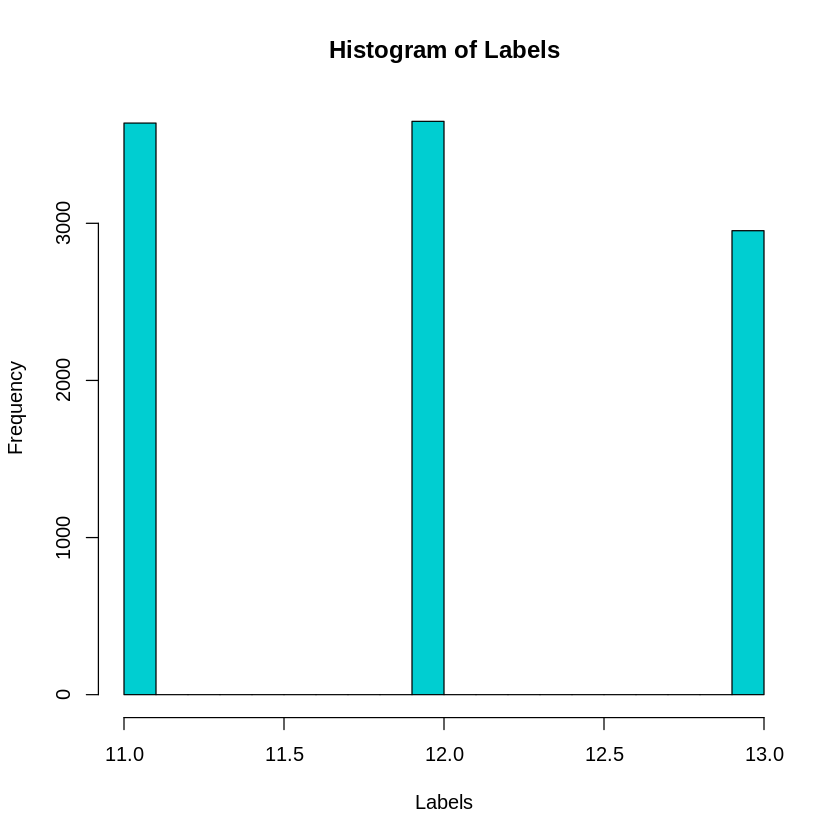

In [28]:
label.list <- c(11,12,13)
df <- DF[DF$Labels %in% label.list1, ]
hm <- hist(df2$Labels, main='Histogram of Labels',col='darkturquoise' , xlab='Labels')

In [29]:
# implement preprocessing step :cleaning data

df_corp <- VCorpus(VectorSource(as.character(df$Text)))
df_corp <- tm_map(df_corp, content_transformer(tolower))
df_corp <- tm_map(df_corp, removePunctuation)
df_corp <- tm_map(df_corp, removeNumbers)
df_corp <- tm_map(df_corp, removeWords, stopwords("english"))
df_corp <- tm_map(df_corp, stemDocument)
df_corp <- tm_map(df_corp, stripWhitespace)
df_dtm  <- DocumentTermMatrix(df_corp)

In [30]:
minfreq     <-  10                                #words with frequency of repetition less that minfreq will be removed
freq_words  <-  findFreqTerms(df_dtm, minfreq)   #findFreqTerms finds the list of words with higher frequecny than minfreq
df_dtm      <-  df_dtm[,freq_words]

In [32]:
train_test_splitter(df_dtm, df, 0.15, 123)

Train Set Size: 7138
Test  Set Size: 1536
Validation Set Size: 1566

In [33]:
nbc <- Train(X_train, Y_train)
Y_pred <- Predict(nbc, X_train)

In [34]:
Y_pred_test  <- Predict(nbc, X_test)

In [35]:
cat("Train  accuracy:",   score(Y_train, Y_pred))
cat("\nTest  accuracy:",   score(Y_test, Y_pred_test))

Train  accuracy: 0.577893
Test  accuracy: 0.4264323

## Hyper Parameter Tuning (Multinomial Case) <a class="anchor" id="hyper"></a>
As an essential part of any machine learning task we perform hyper paramter tuning to reduce the train a better predictor and also reduce the complexity of the model. For the Multinomial case we only consider minfreq, the minimum number a word is repeated in the dataframe as our hyper parameter.  
Just as an example, considering the word "allow". We see that it is repeated 70 times in label 1 and 60 times in label 5. This small differnce deos not help the model to be well trained. But on the other hand when a word has been like 40 times in label 1 and 10 times in label 5. This large differnce will help the classifer to distinguish the label 1 from label 5.

In [ ]:
df_5 <- DF[DF$Labels %in% label.list, ]
hm    <- hist(df_5$Labels, plot =FALSE)

In [ ]:
minfreq.list   <- c(10, 15, 20, 25, 30)   #minfreq

In [ ]:
grid <- data.frame(matrix(ncol = 3, nrow = 0))
params <- c("min.frequecny", "train.acc", "val.acc")
colnames(grid) <- params

### Gridsearch

In [ ]:
# for (minfreq in minfreq.list){
#     df_dtm <- df_cleaner(df_5, threshold=0, minfreq, binom = FALSE)
#     train.acc <- vector() ; val.acc  <- vector()
#     for (SEED in 1:10){
#         train_test_splitter(df_dtm, df_5, test_ratio = 0.15, SEED)
#         nbc <-Train(X_train, Y_train) #training process
#         train.acc <- append(train.acc, score(Y_train, Predict(nbc, X_train)))
#         val.acc  <- append(val.acc,  score(Y_val,  Predict(nbc, X_val )))
#         }

#     grid[nrow(grid) + 1,] = c(minfreq, mean(train.acc), mean(val.acc))
     }

#write.csv(grid, "gridsearch_multi.csv")

In [ ]:
grid <- read.csv("gridsearch_multi.csv")

In [ ]:
grid

X,min.frequecny,train.acc,val.acc
<int>,<int>,<dbl>,<dbl>
1,10,0.4688428,0.2279693
2,15,0.4340852,0.2263729
3,20,0.4028019,0.2226692
4,25,0.3797282,0.2269476
5,30,0.3648641,0.2243295


# Comparing the Accuracies <a class="anchor" id="acc"></a>

In [ ]:
df.acc <- data.frame(matrix(ncol = 7, nrow = 0))
params <- c("No.of.Labels",
            "Train.Acc.e1071", "Test.Acc.e1071","Train.Acc.fastnaive",
            "Test.Acc.fastnaive", "Train.Acc.Model", "Test.Acc.Model")

colnames(df.acc) <- params

In [ ]:
#We so the train and testing using differnt sets of labels
Label_List <- list(c(1,5), c(1,4,5), c(1,2,4,5), c(0,1,2,4,5), c(0,1,2,3,4,5))


best.minfreq   <- 10   
best.threshold <- 0.3
for (label.list in Label_List){
    binom <- FALSE ; best.threshold <- 0    #for multi-label cases, here best.threshold is dummy
    if (length(label.list) == 2) {binom = TRUE ; best.threshold <- 0.3} #for the binomial case

    df <- read.csv("train.csv")       #these line are the preprocessing which are same for all classifers
    df  <- df[df$Labels %in% label.list, ]
    hm    <- hist(df$Labels, plot =FALSE)
    df_dtm <- df_cleaner(df, threshold=best.threshold , minfreq=best.minfreq, binom )

    train.e10 <- vector() ; train.fastnaive <- vector(); train.model <- vector()
    test.e10  <- vector() ; test.fastnaive  <- vector(); test.model  <- vector()

    for (SEED in 1:5){    #considering an ensemble of 5 for stabilizing the result

        #===========e1071============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        NBC <- naiveBayes(X_train, Y_train)
        train.e10 <- append(train.e10, score(Y_train, predict(NBC, X_train)))  #storing the scores
        test.e10  <- append(test.e10,  score(Y_test,  predict(NBC, X_test )))

        #==========fastnaive========#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        fast_nbc <- fnb.multinomial(X_train, Y_train)
        train.fastnaive <- append(train.fastnaive, score(Y_train, predict(fast_nbc, X_train)))
        test.fastnaive  <- append(test.fastnaive,  score(Y_test,  predict(fast_nbc, X_test )))

        #==========model============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        nbc <- Train(X_train, Y_train)
        train.model <- append(train.model, score(Y_train, Predict(nbc, X_train)))
        test.model  <- append(test.model,  score(Y_test,  Predict(nbc, X_test )))

        }

    df.acc[nrow(df.acc) + 1,] <- c(length(label.list),
                                  mean(train.e10), mean(test.e10),
                                  mean(train.fastnaive), mean(test.fastnaive),
                                  mean(train.model), mean(test.model))
   }

write.csv(df.acc, "all_acc_new.csv")

In [ ]:
df.acc <- read.csv("all_acc_new.csv")

In [ ]:
df.acc

X,No.of.Labels,Train.Acc.e1071,Test.Acc.e1071,Train.Acc.fastnaive,Test.Acc.fastnaive,Train.Acc.Model,Test.Acc.Model
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.6699875,0.57874659,0.6919054,0.6160763,0.6798672,0.6087193
2,3,0.3993241,0.32483370,0.5981075,0.4796009,0.5835079,0.4762749
3,4,0.2401289,0.18293051,0.5075472,0.3395770,0.4948919,0.3429003
4,5,0.1595286,0.12471299,0.4592156,0.2657402,0.4437488,0.2673112
5,6,0.1027687,0.09052734,0.4279547,0.2215820,0.4100327,0.2234375


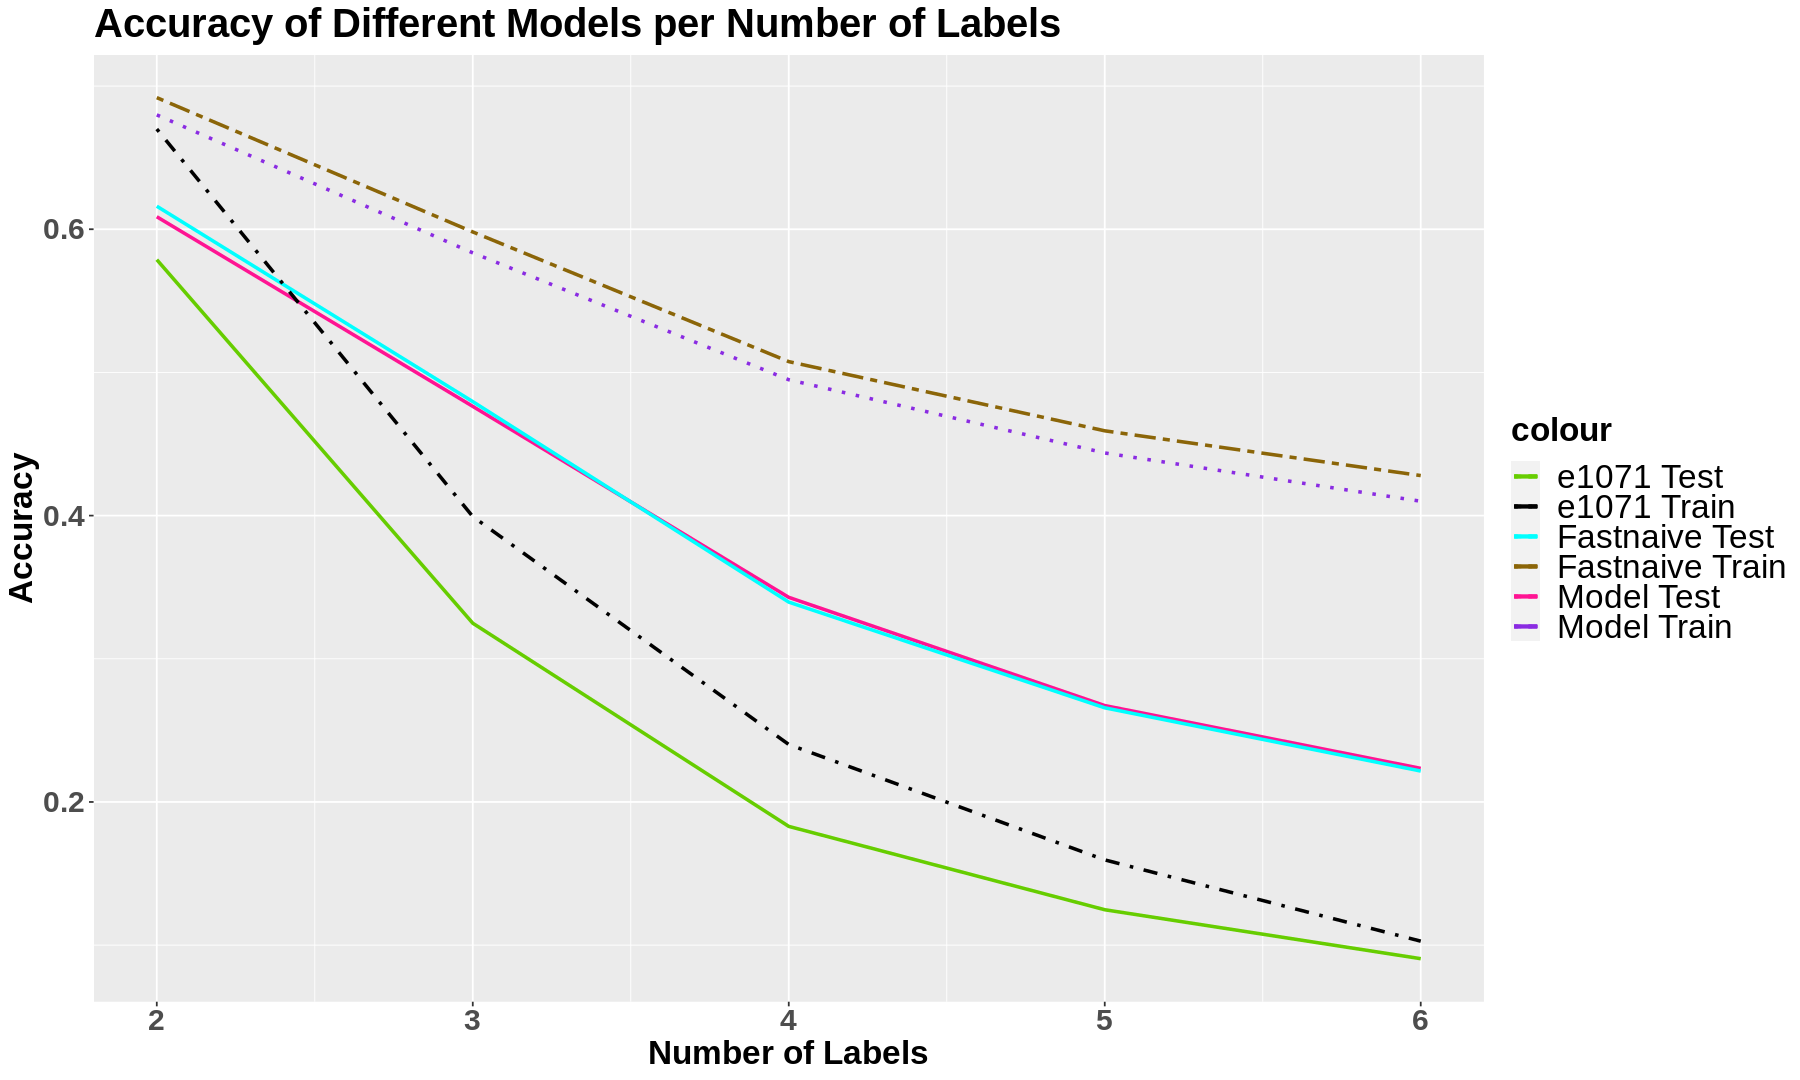

In [ ]:
options(repr.plot.width=15, repr.plot.height =9)  #changing size of plots

ggplot(data = df.acc, aes(x = No.of.Labels)) +
  geom_line(aes(y = Test.Acc.Model, colour = "Model Test"),         lwd=1) +
  geom_line(aes(y = Test.Acc.fastnaive, colour = "Fastnaive Test"), lwd=1) +
  geom_line(aes(y = Test.Acc.e1071, colour = "e1071 Test"),         lwd=1) +

  geom_line(aes(y = Train.Acc.Model, colour = "Model Train", ), linetype = "dotted",  lwd=1) +
  geom_line(aes(y = Train.Acc.fastnaive, colour = "Fastnaive Train"),linetype = "twodash", lwd=1) +
  geom_line(aes(y = Train.Acc.e1071, colour = "e1071 Train"),  linetype = "dotdash",       lwd=1) +

  labs(title = "Accuracy of Different Models per Number of Labels",
         x = "Number of Labels",
         y = "Accuracy") +
  scale_color_manual(values = c("chartreuse3", "black", "cyan", "darkgoldenrod4", "deeppink1",'blueviolet' ))+
  theme(legend.text = element_text(size = 20),
      axis.text.y = element_text(face="bold", size=18),
      axis.text.x = element_text(face="bold", size=18),
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      title =element_text(size=20, face='bold'))


#### Testing on The dataset without labels <a class="anchor" id="less"></a>

In [ ]:
DF <- read.csv("train.csv")
DF2<- read.csv("test.csv")
df_sub<-DF[,-1]
DF_comb<-rbind(df_sub,DF2)
head(DF_comb)
cat("dataset size:", nrow(DF_comb))

,Text,Text_Tag
,<chr>,<chr>
1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,The economic turnaround started at the end of my term.,"economy,jobs"
6,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


dataset size: 11507

In [ ]:
label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5

In [ ]:
df_dtm <- df_cleaner(DF_comb, threshold= 0, minfreq = 10, binom = FALSE)
df_dtm

<<DocumentTermMatrix (documents: 11507, terms: 1785)>>
Non-/sparse entries: 99532/20440463
Sparsity           : 100%
Maximal term length: 15
Weighting          : term frequency (tf)

In [ ]:
X<- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y<- df$Labels

In [ ]:
X_train   <- X[1:10240, ]
X_test    <- X[10241:11507, ]
Y_train   <- Y

In [ ]:
nbc <- Train(X_train, Y_train)

In [ ]:
Y_pred <- Predict(nbc, X_test)

In [ ]:
DF_fin<-cbind(DF2,Y_pred)
tail(DF_fin)

,Text,Text_Tag,Y_pred
,<chr>,<chr>,<dbl>
1262,Sen. Bob Menendez voted to enact a new tax on the sale of homes of 3.8%.,"health-care,housing,income,taxes",0
1263,Says his budget provides the highest state funding level in history for education.,education,3
1264,Ive been here almost every day.,"civil-rights,crime,criminal-justice",3
1265,"In the early 1980s, Sen. Edward Kennedy secretly offered to help Soviet leaders counter the Reagan administrations position on nuclear disarmament.","bipartisanship,congress,foreign-policy,history",4
1266,Says an EPA permit languished under Strickland but his new EPA director got it done in two days.,"environment,government-efficiency",1
1267,Says the governor is going around the state talking about [how] we should fund an income tax cut that benefits higher income earners and not lower income earners,"state-budget,state-finances,taxes",5


## New dataset

Since the algorithm applied to the original dataset does not perform as expected, we test it on a bigger new dataset characterized by two labels (True -> 0, False -> 1).

1: unreliable , 0: reliable
train.csv: A full training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

[3] https://www.kaggle.com/competitions/fake-news/data?select=train.csv

Dataset loading and processing to make it work with our previous functions and methods.

In [ ]:
seed <- 54321
set.seed(seed)

NEW_DF <- read.csv("train.csv")

# select a subset of the data
data <- NEW_DF[sample(nrow(NEW_DF), 8000), ]

head(data)
cat("dataset size:", nrow(data))

id   
11580 11579
17983 17982
14190 14189
3239   3238
13706 13705
8955   8954
      title                                                                                                    
11580 H.I.V. Cases Surpass a Million in Russia, but Little Is Done - The New York Times                        
17983 What Is At Stake In The Election                                                                         
14190 CT Gov. Malloy Instructs School Superintendents to Follow Obama’s Transgender Bathroom Policy - Breitbart
3239  Mexico Prepares to Counter ‘the Trump Emergency’ - The New York Times                                    
13706 Compound found in onions has anti-ovarian cancer effects                                                 
8955  Saudi Arabia Re-Elected, Russia Loses UN Human Rights Council Place                                      
      author                       
11580 Neil MacFarquhar             
17983 nan                          
14190 Dr. Susan Berry              
3239  Kirk Semple                  
13706 David Gutierrez, staff writer
8955  Carol Adl                    
      text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

dataset size: 8000

In [ ]:
columns_to_keep <- c("text", "label")
selected_data <- data[, columns_to_keep]
head(selected_data)

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

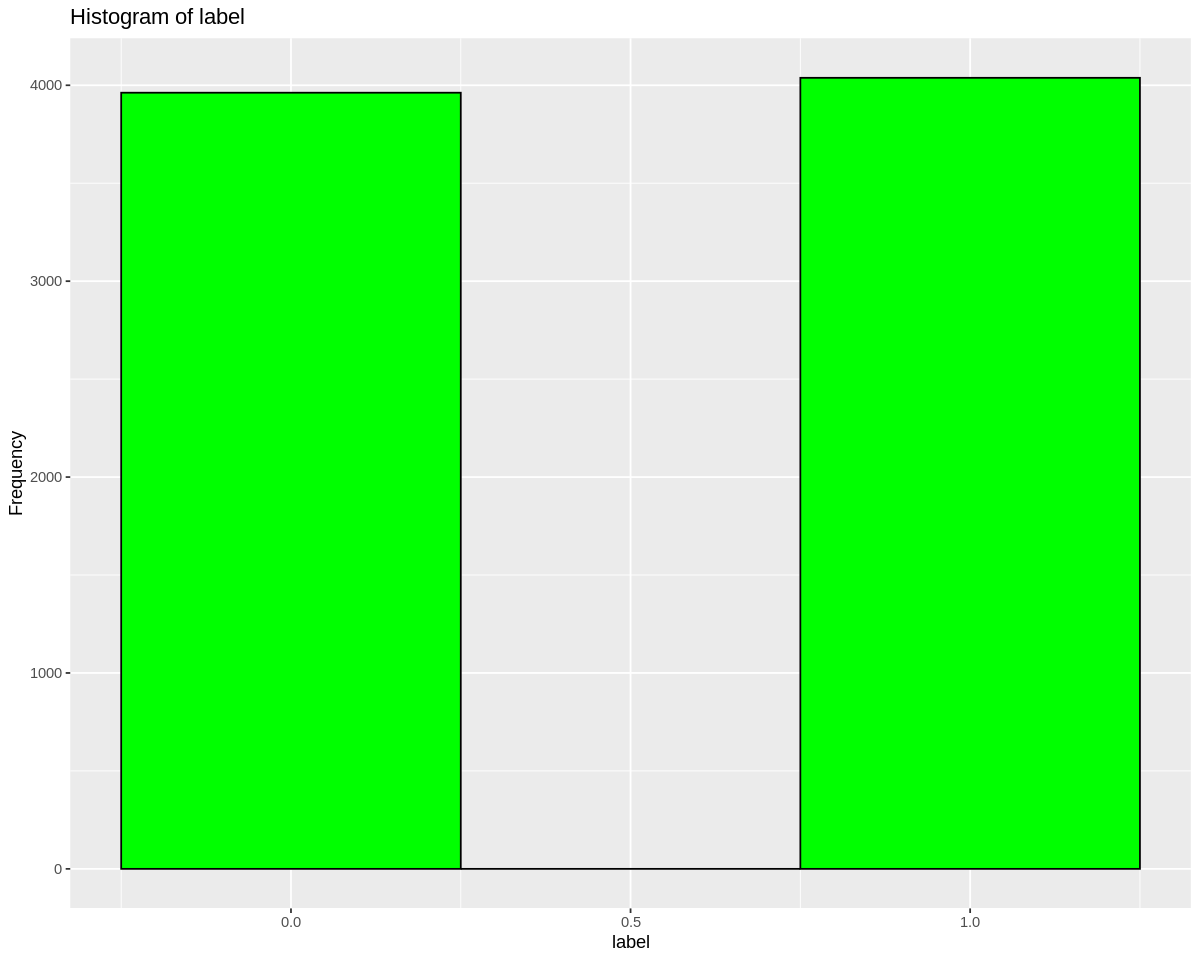

In [ ]:
histogram <- ggplot(selected_data, aes(x = label)) +
  geom_histogram(binwidth = 0.5, fill = "green", color = "black") +
  labs(x = "label", y = "Frequency") +
  ggtitle("Histogram of label")
 

label.list <- c(0,1)
df <- selected_data[selected_data$label %in% label.list, ]   #filtering the dataframe for the lables in label.list
#hm <- hist(selected_data$label, main='Histogram of Labels',col='green' , xlab='Labels')

print(histogram)

In [ ]:
nrow(df)

[1] 8000

In [ ]:
# cleaning
df <- VCorpus(VectorSource(df$text))
df <- tm_map(df ,content_transformer(tolower))
df <- tm_map(df ,removeNumbers)
df <- tm_map(df ,removeWords,stopwords())
df <- tm_map(df ,removePunctuation)
df <- tm_map(df ,stemDocument)
df <- tm_map(df ,stripWhitespace)
df_dtm  <- DocumentTermMatrix(df)


In [ ]:
minfreq     <-  10                                #words with frequency of repetition less that minfreq will be removed
freq_words  <-  findFreqTerms(df_dtm, minfreq)   #findFreqTerms finds the list of words with higher frequecny than minfreq
df_dtm      <-  df_dtm[,freq_words]

In [ ]:
# split the data same as before

test_ratio <- 0.15
SEED       <- 5

X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y   <- selected_data$label

set.seed(SEED)
test_size  <- as.integer(nrow(X)* test_ratio)
train_size <- nrow(X) - test_size

test_index <- sample(seq(1:nrow(X)), test_size)

X_test    <- X[test_index, ]         #reading the features from the document term matrix
Y_test    <- Y[test_index  ]         #reading the labels from the initial dataframe

X_train   <- X[! seq(1:nrow(X)) %in% test_index, ]
Y_train   <- Y[! seq(1:nrow(X)) %in% test_index  ]

X_val     <- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
Y_val     <- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]

X_train   <- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ]
Y_train   <- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]

cat("Train  Set Size:", nrow(X_train))
cat("\nTest   Set Size:", length(Y_test))
cat("\nValid. Set Size:", length(Y_val))

Train  Set Size: 5576
Test   Set Size: 1200
Valid. Set Size: 1224

In [ ]:
nbc <- Train(X_train, Y_train)
Y_pred <- Predict(nbc, X_train)

In [ ]:
Y_pred_test  <- Predict(nbc, X_test)

In [ ]:
cat("Train  accuracy:",   score(Y_train, Y_pred))
cat("\nTest  accuracy:",   score(Y_test, Y_pred_test))

Train  accuracy: 0.625
Test  accuracy: 0.6141667

### In conclusion

In this study, I employed a Multinomial Naive Bayes classifier to address the challenging task of classifying between fake and true news.

Throughout my experimentation, I explored the impact of varying the number of classes, ranging from 2 to 6, and applied the model on datasets. I observed improvements in classification accuracy when focusing on binary classification (fake vs. true news), the performance was not flawless, highlighting the inherent difficulties in distinguishing between these categories.

### strategies and steps we can consider to potentially achieve better results:

1. Data Quality: Ensure your dataset is clean and high-quality. Eliminate duplicates and handle missing values if applicable.

2. Data Augmentation: If your dataset is limited, consider data augmentation techniques to create synthetic samples, especially for the minority class (e.g., fake news).

3. Cross-Validation:Use cross-validation to assess the generalization performance of your model and avoid overfitting. This helps in getting a more accurate estimate of your model's performance.

4. Collect Additional Features:Consider incorporating additional features beyond just text, such as metadata (e.g., publication date, source credibility) or user-generated content (e.g., comments or reactions) if available and relevant.